___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [2]:
#pip install missingno

In [3]:
#pip install metrics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, f1_score, roc_auc_score
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report #plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import missingno as msno

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
dff = pd.read_csv("ANSUR II FEMALE Public.csv")

In [6]:
dff

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         10037                             231            1282   
1         10038                             194            1379   
2         10042                             183            1369   
3         10043                             261            1356   
4         10051                             309            1303   
...         ...                             ...             ...   
1981      29501                             285            1392   
1982      29502                             262            1324   
1983      29503                             260            1334   
1984      29511                             205            1293   
1985     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
1981                    335                 223          1297   
1982                    301                 202          1204   
1983                    318                 213          1259   
1984                    302                 199          1207   
1985                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
1981                      252               196                368   
1982                      236               181                378   
1983                      234               183                363   
1984                      213               163                376   
1985                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           315               263               466   
1                           272               250               430   
2                           300               276               450   
3                           364               276               484   
4                           320               336               525   
...                         ...               ...               ...   
1981                        299               312               477   
1982                        294               287               468   
1983                        332               299               460   
1984                        276               280               426   
1985                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     65               338                        301   
1                     64               294                        270   
2                     69               309                        270   
3                     68               340                        294   
4                     67               300                        295   
...                  ...               ...                        ...   
1981                  72               306                        282   
1982                  66               309                        311   
1983                  70               317                        311

In [7]:
dff.shape

(1986, 108)

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [9]:
dff.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [10]:
dff.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [11]:
dff.isnull().any().any()

True

In [12]:
dfm = pd.read_csv("ANSUR II MALE Public.csv",encoding= "iso-8859-1")

In [13]:
dfm

subjectid  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
4077      29442                             235            1353   
4078      29443                             247            1473   
4079      29447                             264            1394   
4080      29451                             203            1417   
4081      29452                             327            1523   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
4077                    312                 216          1263   
4078                    336                 234          1346   
4079                    313                 227          1280   
4080                    327                 223          1314   
4081                    358                 226          1408   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
4077                      228               193                384   
4078                      253               196                428   
4079                      245               193                407   
4080                      250               196                419   
4081                      269               225                442   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
4077                        318               241               457   
4078                        374               284               536   
4079                        367               271               501   
4080                        365               271               493   
4081                        379               275               531   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
4077                  70               321                        301   
4078                  76               319                        316   
4079                  74               323                        316

In [14]:
dfm.shape

(4082, 108)

In [15]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [16]:
dfm.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [17]:
print(dff.columns==dfm.columns)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [18]:
dfm.columns = dfm.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [19]:
dff.columns = dff.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [20]:
print(dff.columns==dfm.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [21]:
df = dfm.append(dff, ignore_index=True)
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [22]:
df.shape

(6068, 108)

In [23]:
#sns.pairplot(df)

## Explore Data

In [24]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

In [25]:
# For checking missing values and missing percent

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [26]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [27]:
def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [29]:
df.describe().T

count          mean           std  \
subjectid                      6068.0000000 20757.1984179 13159.3908939   
abdominalextensiondepthsitting 6068.0000000   246.4686882    37.4001061   
acromialheight                 6068.0000000  1406.1613382    79.0910484   
acromionradialelength          6068.0000000   327.3744232    20.7200182   
anklecircumference             6068.0000000   224.8913975    16.0518333   
axillaheight                   6068.0000000  1299.6087673    72.0222861   
balloffootcircumference        6068.0000000   244.1926500    16.8450202   
balloffootlength               6068.0000000   194.7546144    13.5163681   
biacromialbreadth              6068.0000000   399.2041859    30.2369141   
bicepscircumferenceflexed      6068.0000000   340.9342452    41.5198658   
bicristalbreadth               6068.0000000   274.7350033    19.2210339   
bideltoidbreadth               6068.0000000   490.7544496    42.1355355   
bimalleolarbreadth             6068.0000000    72.2526368     5.3445904   
bitragionchinarc               6068.0000000   324.8965063    17.0875011   
bitragionsubmandibulararc      6068.0000000   306.6361239    20.7941656   
bizygomaticbreadth             6068.0000000   139.7234674     7.3084571   
buttockcircumference           6068.0000000  1020.0847067    76.4226431   
buttockdepth                   6068.0000000   241.6199736    26.4829861   
buttockheight                  6068.0000000   870.1522742    54.8225741   
buttockkneelength              6068.0000000   608.9991760    33.7928393   
buttockpopliteallength         6068.0000000   497.0975610    29.0823905   
calfcircumference              6068.0000000   386.0411997    30.6471803   
cervicaleheight                6068.0000000  1477.4904417    84.3237074   
chestbreadth                   6068.0000000   282.8590969    20.6593974   
chestcircumference             6068.0000000  1022.0988794   100.6717512   
chestdepth                     6068.0000000   251.7384641    26.7778434   
chestheight                    6068.0000000  1252.0131839    79.5839716   
crotchheight                   6068.0000000   825.1100857    54.7482400   
crotchlengthomphalion          6068.0000000   621.8516809    45.3329614   
crotchlengthposterioromphalion 6068.0000000   351.3159196    29.9448683   
earbreadth                     6068.0000000    35.1321688     3.2314692   
earlength                      6068.0000000    62.6259064     4.8762637   
earprotrusion                  6068.0000000    22.2633487     3.1727154   
elbowrestheight                6068.0000000   240.9113382    28.5094472   
eyeheightsitting               6068.0000000   785.9144693    41.8657949   
footbreadthhorizontal          6068.0000000    98.8653593     6.6579155   
footlength                     6068.0000000   263.0336190    17.3909712   
forearmcenterofgriplength      6068.0000000   338.7666447    23.2447423   
forearmcircumferenceflexed     6068.0000000   295.0107119    30.0497151   
forearmforearmbreadth          6068.0000000   552.0759723    62.3680489   
forearmhandlength              6068.0000000   467.0070864    30.0348204   
functionalleglength            6068.0000000  1102.0492749    68.5457841   
handbreadth                    6068.0000000    84.9533619     6.3465104   
handcircumference              6068.0000000   203.8614041    15.5514239   
handlength                     6068.0000000   189.2865854    11.5057881   
headbreadth                    6068.0000000   152.1827620     6.2356916   
headcircumference              6068.0000000   570.0352670    18.2911388   
headlength                     6068.0000000   196.3348715     8.4853740   
heelanklecircumference         6068.0000000   332.6229400    22.4607758   
heelbreadth                    6068.0000000    70.7569216     5.9326262   
hipbreadth                     6068.0000000   348.3854647    25.2978284   
hipbreadthsitting              6068.0000000   385.7333553    32.3999050   
iliocristaleheight             6068.0000000  1040.0594924    59

In [30]:
df.nunique().sort_values()

gender                               2
writingpreference                    3
branch                               3
component                            3
dodrace                              7
installation                        12
earprotrusion                       22
earbreadth                          22
heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
age                                 42
heelbreadth                         42
subjectnumericrace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [31]:
df.duplicated().value_counts()

False    6068
dtype: int64

In [32]:
missing(df)

Missing_Number  Missing_Percent
ethnicity                                 4647        0.7658207
subjectid                                    0        0.0000000
radialestylionlength                         0        0.0000000
thighcircumference                           0        0.0000000
tenthribheight                               0        0.0000000
suprasternaleheight                          0        0.0000000
stature                                      0        0.0000000
span                                         0        0.0000000
sleeveoutseam                                0        0.0000000
sleevelengthspinewrist                       0        0.0000000
sittingheight                                0        0.0000000
shoulderlength                               0        0.0000000
shoulderelbowlength                          0        0.0000000
shouldercircumference                        0        0.0000000
poplitealheight                              0        0.0000000
thumbtipreach                                0        0.0000000
palmlength                                   0        0.0000000
overheadfingertipreachsitting                0        0.0000000
neckcircumferencebase                        0        0.0000000
neckcircumference                            0        0.0000000
mentonsellionlength                          0        0.0000000
lowerthighcircumference                      0        0.0000000
lateralmalleolusheight                       0        0.0000000
lateralfemoralepicondyleheight               0        0.0000000
kneeheightsitting                            0        0.0000000
kneeheightmidpatella                         0        0.0000000
thighclearance                               0        0.0000000
tibialheight                                 0        0.0000000
abdominalextensiondepthsitting               0        0.0000000
tragiontopofhead                             0        0.0000000
weightlbs                                    0        0.0000000
heightin                                     0        0.0000000
age                                          0        0.0000000
dodrace                                      0        0.0000000
subjectnumericrace                           0        0.0000000
subjectsbirthlocation                        0        0.0000000
primarymos                                   0        0.0000000
branch                                       0        0.0000000
component                                    0        0.0000000
installation                                 0        0.0000000
date                                         0        0.0000000
gender                                       0        0.0000000
wristheight                                  0        0.0000000
wristcircumference                           0        0.0000000
weightkg                                     0        0.0000000
waistheightomphalion                         0        0.0000000
waistfrontlengthsitting                      0        0.0000000
waistdepth                                   0        0.0000000
waistcircumference                           0        0.0000000
waistbreadth                                 0        0.0000000
waistbacklength                              0        0.0000000
verticaltrunkcircumferenceusa                0        0.0000000
trochanterionheight                          0        0.0000000
interscyeii                                  0        0.0000000
interscyei                                   0        0.0000000
interpupillarybreadth                        0        0.0000000
chestheight                                  0        0.0000000
chestcircumference                           0        0.0000000
chestbreadth                                 0        0.0000000
cervicaleheight                              0        0.0000000
calfcircumference                            0        0.0000000
buttockpopliteallength                       0        0.0000000


In [33]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [34]:
df.corr().style.background_gradient(cmap='RdPu')

In [35]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df.corr()).style.applymap(color_red)

In [36]:
(df.subjectnumericrace==df.dodrace).value_counts()

True     5262
False     806
dtype: int64

In [37]:
(df.subjectnumericrace==df.dodrace)>8

0       False
1       False
2       False
3       False
4       False
        ...  
6063    False
6064    False
6065    False
6066    False
6067    False
Length: 6068, dtype: bool

In [38]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]]

subjectnumericrace  dodrace
10                   351        1
27                    61        1
36                    61        1
56                    28        2
71                    28        2
79                    21        2
111                   41        4
118                   31        3
120                  641        4
126                   23        2
150                   31        1
151                  251        2
157                   38        3
163                   61        6
176                   41        4
188                   21        2
203                   23        2
210                   28        2
232                   31        3
262                   31        1
264                   51        1
268                   41        1
290                   31        3
301                   31        1
312                   21        2
313                   61        4
317                   61        4
321                   28        2
328                   18        2
338                   31        3
345                   18        8
355                   31        3
358                   51        5
383                   51        1
386                   51        5
387                   64        4
392                   31        1
394                   21        2
410                   31        1
415                   38        3
420                   31        3
423                   51        1
424                   51        5
449                  318        8
450                   31        3
455                   31        3
459                   31        1
471                   41        5
473                   18        2
475                   31        1
487                   31        3
504                   51        1
505                   41        4
506                   21        2
514                   41        4
523                   51        5
527                   21        2
528                   18        1
537                   28        2
543                   21        2
551                   31        1
555                   51        1
557                   31        3
560                   31        3
563                   63        3
564                   18        1
565                   41        1
574                   31        8
575                   31        3
591                   31        3
603                   31        3
645                   31        3
648                   51        1
653                   51        1
654                  351        3
674                   51        1
678                   51        5
695                   25        2
736                   43        4
739                   51        3
743                   31        1
746                   31        3
749                   51        5
752                   28        2
762                   61        6
783                   31        3
790                   21        2
828                   31        1
835                   31        3
873                   28        2
879                   31        1
887                   31        1
896                   31        1
907                   31        3
910                   41        4
911                   64        4
935                  423        2
936                   35        3
938                   31        3
960                   25        2
964                   31        1
966                   31        3
977                  251        2
978                   51        1
987                   31        3
1029                  51        1
1058                  18        1
1076                  18        1
1079                  31        1
1081                  21        1
1096                  51        1
1097                  31        3
1116                  51        1
1148                  31        1
1152                  31        3
1153                  51        1
1154                  51    

In [39]:
df.dodrace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [40]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [41]:
drop_columns = ["subjectnumericrace",
                "subjectid",
                "date",
                "installation",
                "component",
                "branch",
                "primarymos",
                "ethnicity",
                "age",
                "weightlbs", 
                "heightin"]
   

In [42]:
df.drop(drop_columns, inplace=True, axis=1)

In [43]:
df.shape

(6068, 97)

### Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [44]:
(df['dodrace'].value_counts()<500)

1    False
2    False
3    False
4     True
6     True
5     True
8     True
Name: dodrace, dtype: bool

In [46]:
df["dodrace"] = df.dodrace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})


In [47]:
df.drop(df[df['dodrace']=="Asian"].index, inplace = True)

In [48]:
df.drop(df[df['dodrace']=="Native American"].index, inplace = True)

In [49]:
df.drop(df[df['dodrace']=="Pacific Islander"].index, inplace = True)

In [50]:
df.drop(df[df['dodrace']=="Other"].index, inplace = True)

In [51]:
df.shape

(5769, 97)

In [52]:
df['dodrace'].iplot(kind='hist')

In [53]:
numerical= df.drop(['dodrace'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', '

In [54]:
first_looking("gender")

column name    :  gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Male      3899
Female    1870
Name: gender, dtype: int64


In [55]:
first_looking("subjectsbirthlocation")

column name    :  subjectsbirthlocation
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  136
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky             

In [58]:
df.corr().style.background_gradient(cmap='RdPu')

In [59]:
df.shape

(5769, 97)

In [60]:
df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   
1               257               479                  67               344   
2               261               544                  75               345   
3               262               518                  73               328   
4               263               524                  80               340   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   
1                        320                 135                   944   
2                        330                 135                  1054   
3                        309                 143                   991   
4                        310                 138                  1029   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   
1           232            870                584                     468   
2           258            901                623                     506   
3           242            821                560                     437   
4           275           1080                706                     567   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   
1                357             1471           269                1021   
2                412             1501           288                1120   
3                395             1423           296                1114   
4                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   
1         253         1244           851                    615   
2         267         1288           854                    636   
3         262         1205           769                    590   
4         232         1452          1014                    682   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   
1                             376          33         62             18   
2                             359          40         61             23   
3                             341          39         66             25   
4                             382          32         56             19   

   elbowrestheight  eyeheightsitting  footbreadthhorizonta

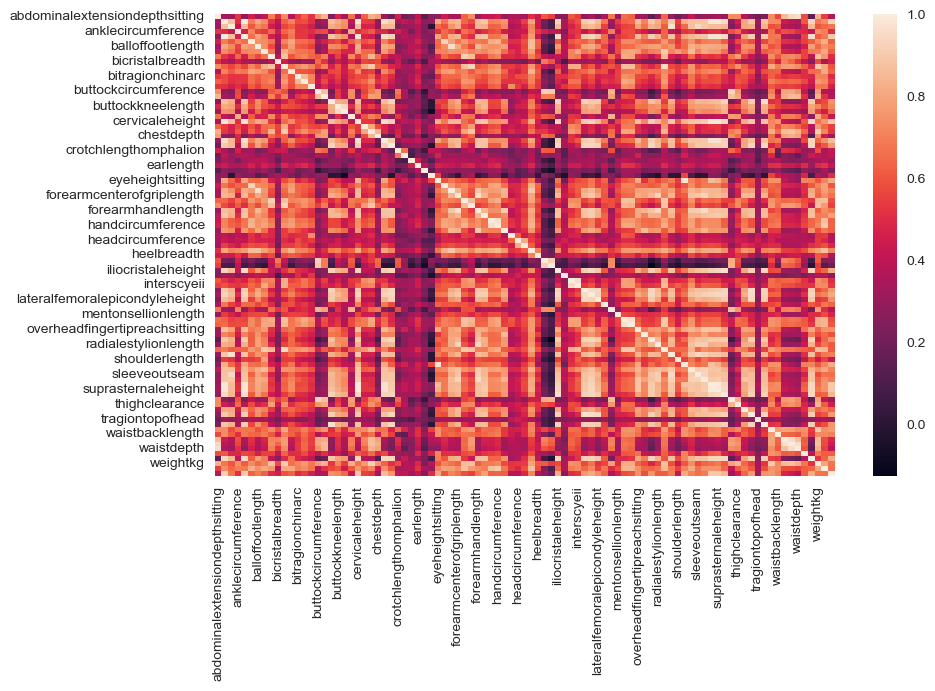

In [61]:
sns.heatmap(df.corr());

In [62]:
df.gender = df.gender.map({"Male": 1, "Female": 0})

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [63]:
X = df.drop('dodrace',axis=1)
y = df['dodrace']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify= y)

In [65]:
print("X_train shape : ", X_train.shape)
print("y_train shape   : ", y_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_test shape    : ", y_test.shape)

X_train shape :  (4615, 96)
y_train shape   :  (4615,)
X_test shape  :  (1154, 96)
y_test shape    :  (1154,)


In [66]:
cat = X_train.select_dtypes("object").columns
cat

Index(['subjectsbirthlocation', 'writingpreference'], dtype='object')

In [67]:
shape_control()

df.shape: (5769, 97)
X.shape: (5769, 96)
y.shape: (5769,)
X_train.shape: (4615, 96)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [68]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())

## 1. Logistic model

### Vanilla Logistic Model

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]
pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('logistic', LogisticRegression())])

In [71]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [73]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[730  11  17]
 [ 22 237   1]
 [ 56   7  73]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       758
           2       0.93      0.91      0.92       260
           3       0.80      0.54      0.64       136

    accuracy                           0.90      1154
   macro avg       0.88      0.80      0.83      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[2958   22   54]
 [  71  953   14]
 [ 198   27  318]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.95      0.92      0.93      1038
           3       0.82      0.59      0.68       543

    accuracy                           0.92      4615
   macro avg       0.90      0.83      0.85      4615
weighted avg       0.91      0.92      0.91      4615



In [73]:
from sklearn.model_selection import cross_validate

In [74]:
#column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.8983773
train_accuracy             0.9122188
test_precision_weighted    0.8953683
train_precision_weighted   0.9092433
test_recall_weighted       0.8983773
train_recall_weighted      0.9122188
test_f1_weighted           0.8925304
train_f1_weighted          0.9071589
dtype: float64

In [75]:
from sklearn.compose import make_column_transformer

In [76]:
from sklearn.metrics import make_scorer

In [77]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
f1_hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])
cv = 10 
scoring = {"precision_hispanic": precision_hispanic, 
           "recall_hispanic": recall_hispanic, 
           "f1_hispanic": f1_hispanic}

In [78]:
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_hispanic    0.7920710
train_precision_hispanic   0.8224324
test_recall_hispanic       0.5378114
train_recall_hispanic      0.5647679
test_f1_hispanic           0.6366889
train_f1_hispanic          0.6696213
dtype: float64

### Logistic Model GridsearchCV

In [79]:
pipe_log_model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
  ('logistic', LogisticRegression())],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))]),
 'logistic': LogisticRegression(),
 'OneHotEncoder__n_jobs': None,
 'OneHotEncoder__remainder__clip': False,
 'OneHotEncoder__remainder__copy': True,
 'OneHotEncoder__remainder__feature_ra

In [86]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [88]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [84]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False),cat), remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = 10 #shuffle = True, random_state = 42

log_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = scoring,  
                          n_jobs = -1,
                          return_train_score=True)

In [91]:


log_model_grid.fit(X_train,y_train)

/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: Future

/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: Future

/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tugbakaragozoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: Future

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [92]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [93]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[236  16   8]
 [  6 109  21]
 [ 14  89 655]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91       260
    Hispanic       0.51      0.80      0.62       136
       White       0.96      0.86      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 967   35   36]
 [  24  446   73]
 [  69  378 2587]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.52      0.82      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



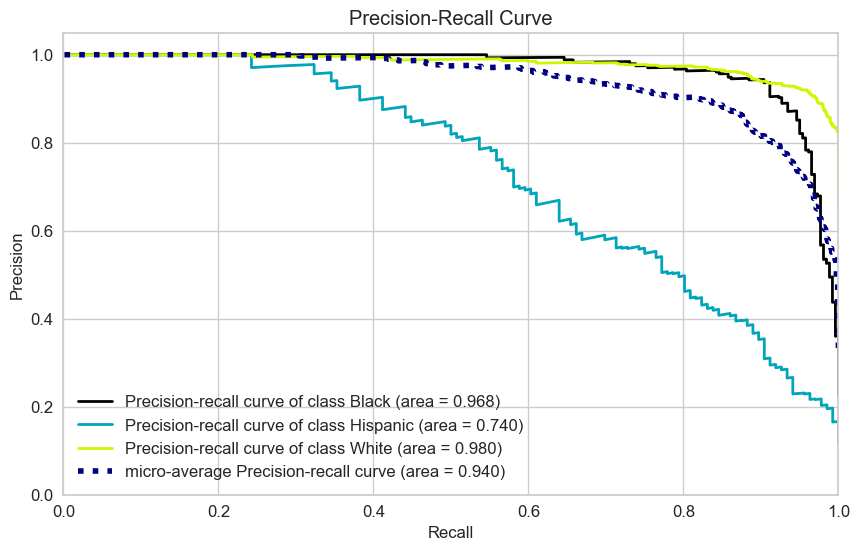

In [94]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [95]:
from sklearn.metrics import average_precision_score

In [119]:


y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# 0 black, 1 hispanic, 2 white  skorlarını döndürür.
# Burda 2 vererek hispanic skorları aldık.

0.7398486440075299

In [120]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# tüm modellerden aldığımız skorları aşağıda tabloda karşılaştıracağımızdan skorlarımızı değişkenlere atıyoruz.

## 2. SVC

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

### Vanilla SVC model 

In [99]:
#column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False),cat), remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans),("scaler", MinMaxScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

In [100]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[227   0  33]
 [  8  32  96]
 [  5   2 751]]
              precision    recall  f1-score   support

       Black       0.95      0.87      0.91       260
    Hispanic       0.94      0.24      0.38       136
       White       0.85      0.99      0.92       758

    accuracy                           0.88      1154
   macro avg       0.91      0.70      0.73      1154
weighted avg       0.88      0.88      0.85      1154


Train_Set
[[ 921    2  115]
 [  32  158  353]
 [  15    4 3015]]
              precision    recall  f1-score   support

       Black       0.95      0.89      0.92      1038
    Hispanic       0.96      0.29      0.45       543
       White       0.87      0.99      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.93      0.72      0.76      4615
weighted avg       0.90      0.89      0.87      4615



In [101]:
#column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False),cat), remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_hispanic    0.9553839
train_precision_hispanic   0.9634560
test_recall_hispanic       0.2487205
train_recall_hispanic      0.2799373
test_f1_hispanic           0.3909098
train_f1_hispanic          0.4335347
dtype: float64

In [102]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

operations = [("OneHotEncoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("svc", SVC())]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train,
                        scoring = scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.3909098
train_f1_Hispanic          0.4335347
test_precision_Hispanic    0.9553839
train_precision_Hispanic   0.9634560
test_recall_Hispanic       0.2487205
train_recall_Hispanic      0.2799373
dtype: float64

###  SVC Model GridsearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [107]:
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, 
                              param_grid, 
                              scoring= recall_hispanic, 
                              cv=5, 
                              return_train_score=True)

In [108]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.05],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [109]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('SVC',
                 SVC(C=0.05, class_weight='balanced', kernel='linear',
                     probability=True))])

In [110]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[232  18  10]
 [  7 105  24]
 [ 11 111 636]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       260
    Hispanic       0.45      0.77      0.57       136
       White       0.95      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.78      0.83      0.79      1154
weighted avg       0.89      0.84      0.86      1154


Train_Set
[[ 934   45   59]
 [  28  437   78]
 [  65  491 2478]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.90      1038
    Hispanic       0.45      0.80      0.58       543
       White       0.95      0.82      0.88      3034

    accuracy                           0.83      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.88      0.83      0.85      4615



In [111]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

array([[ 2.15666436,  0.89826568, -0.10305101],
       [-0.25841924,  1.19998039,  2.22033548],
       [-0.22290822,  0.80493023,  2.25808015],
       ...,
       [ 2.23635926, -0.19891733,  0.8369535 ],
       [-0.25467417,  1.13591746,  2.23941571],
       [-0.2057821 ,  0.84429469,  2.23781988]])

In [112]:
predict_proba = svm_model_grid.predict_proba(X_test)[:,1]
predict_proba

array([0.06104129, 0.11049658, 0.00261718, ..., 0.00363688, 0.03001875,
       0.01125494])

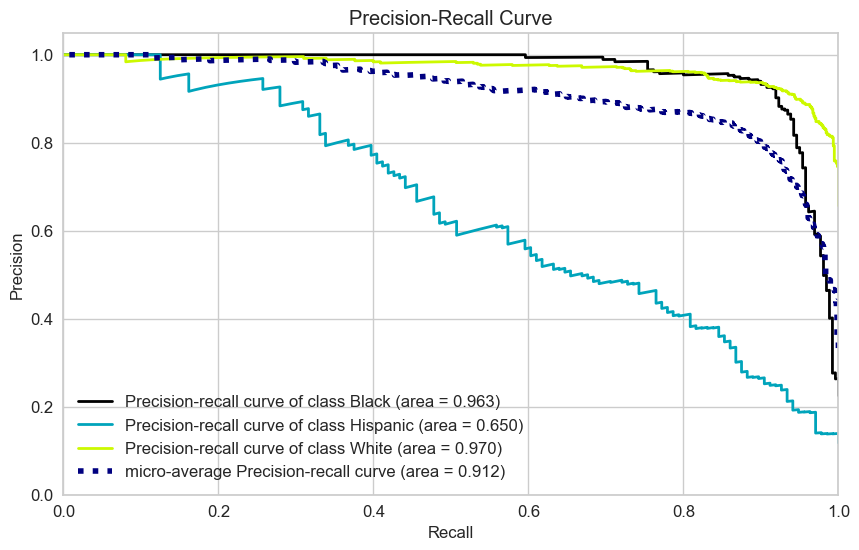

In [113]:
operations = [("OneHotEncoder", column_trans), 
              ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [114]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.9702937678922481

In [115]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [116]:
cat

Index(['subjectsbirthlocation', 'writingpreference'], dtype='object')

In [117]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

In [118]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [125]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[177   0  83]
 [  6   5 125]
 [  9   0 749]]
              precision    recall  f1-score   support

       Black       0.92      0.68      0.78       260
    Hispanic       1.00      0.04      0.07       136
       White       0.78      0.99      0.87       758

    accuracy                           0.81      1154
   macro avg       0.90      0.57      0.58      1154
weighted avg       0.84      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



# cross validation

In [126]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.0597857
train_f1_Hispanic          1.0000000
test_precision_Hispanic    0.7347619
train_precision_Hispanic   1.0000000
test_recall_Hispanic       0.0312776
train_recall_Hispanic      1.0000000
dtype: float64

In [129]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(15,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], filled=True, feature_names=features, fontsize=8);

### RF Model GridsearchCV

In [129]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]}

In [130]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [131]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [132]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.6058784
mean_train_score   0.6418115
Name: 0, dtype: object

In [136]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [137]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [139]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[187  59  14]
 [ 16  83  37]
 [ 68 309 381]]
              precision    recall  f1-score   support

       Black       0.69      0.72      0.70       260
    Hispanic       0.18      0.61      0.28       136
       White       0.88      0.50      0.64       758

    accuracy                           0.56      1154
   macro avg       0.59      0.61      0.54      1154
weighted avg       0.76      0.56      0.61      1154


Train_Set
[[ 726  207  105]
 [  54  347  142]
 [ 270 1116 1648]]
              precision    recall  f1-score   support

       Black       0.69      0.70      0.70      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.87      0.54      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.63      0.56      4615
weighted avg       0.75      0.59      0.63      4615



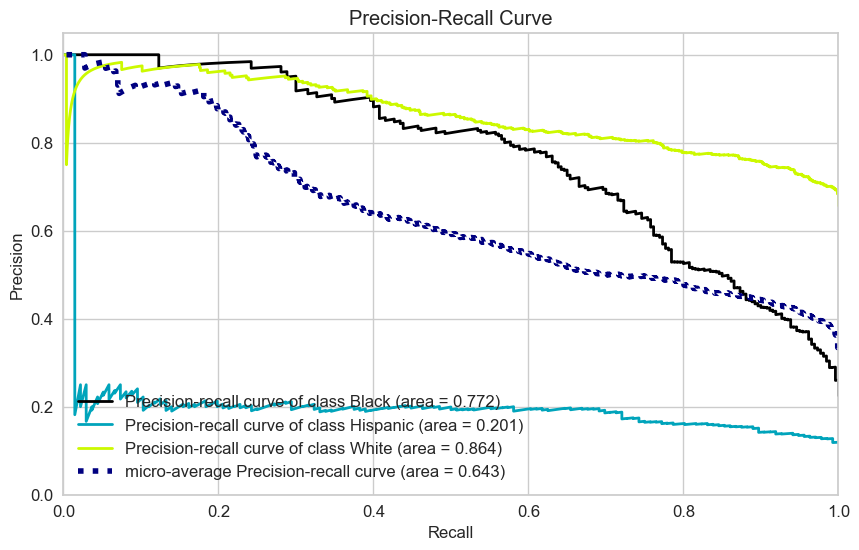

In [140]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=2, 
                                                     n_estimators=400, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [141]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2011328655705033

In [142]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [152]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[375  66 317]
 [ 26 168  66]
 [ 40  16  80]]
              precision    recall  f1-score   support

           1       0.85      0.49      0.63       758
           2       0.67      0.65      0.66       260
           3       0.17      0.59      0.27       136

    accuracy                           0.54      1154
   macro avg       0.57      0.58      0.52      1154
weighted avg       0.73      0.54      0.59      1154


Train_Set
[[1638  292 1104]
 [ 114  731  193]
 [ 137   45  361]]
              precision    recall  f1-score   support

           1       0.87      0.54      0.67      3034
           2       0.68      0.70      0.69      1038
           3       0.22      0.66      0.33       543

    accuracy                           0.59      4615
   macro avg       0.59      0.64      0.56      4615
weighted avg       0.75      0.59      0.63      4615



## 4. XGBoost

### Vanilla XGBoost Model

In [144]:
 #!pip install xgboost==1.7.3
# conda install -c conda-forge xgboost

In [145]:
#conda install -c conda-forge xgboost

In [146]:
import xgboost as xgb

xgb.__version__

'1.7.4'

In [147]:
from xgboost import XGBClassifier

In [149]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2}) # sıralama classification_report ile aynı olacak.
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})
# xgb 1.6 ve üzeri versiyonlarda target numeric olmaz ise hata döndürüyor. Bu sebeple manuel olarak dönüşümü yapıyoruz.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [150]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[222   5  33]
 [  6  49  81]
 [ 11   6 741]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.82      0.36      0.50       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.73      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
#overfiting durumu var 

In [151]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights


array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [152]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
5165 0.5070314      2
5393 0.5070314      2
5659 0.5070314      2
3628 0.5070314      2
2914 0.5070314      2

In [153]:
comp.groupby("label").value_counts()

label  weights  
0      1.4820167    1038
1      2.8330264     543
2      0.5070314    3034
dtype: int64

In [154]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                   XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [155]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[222   8  30]
 [  5  61  70]
 [ 16  16 726]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       260
           1       0.72      0.45      0.55       136
           2       0.88      0.96      0.92       758

    accuracy                           0.87      1154
   macro avg       0.84      0.75      0.78      1154
weighted avg       0.87      0.87      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [158]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

# xgb categric target kabul etmediğinden hispaniclere karşılık gelen 1 numeric clasıına göre scoring_xgb'u düzenliyoruz.




In [159]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.6752304
train_precision_Hispanic   1.0000000
test_recall_Hispanic       0.4050799
train_recall_Hispanic      1.0000000
test_f1_Hispanic           0.5028304
train_f1_Hispanic          1.0000000
dtype: float64

### XGBoost Model GridsearchCV

In [160]:
param_grid = {"XGB_model__n_estimators":[20, 40, 100],
              'XGB_model__max_depth':[1,2,3],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [161]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(recall_score, average = None, labels =[2]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [162]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      col...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2, 3],
                         'XGB_model__n_estimators': [20, 40, 100],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [163]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [164]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [165]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.7900512
mean_train_score   0.8174032
Name: 70, dtype: object

In [166]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[218  26  16]
 [ 11  91  34]
 [ 37 134 587]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       260
           1       0.36      0.67      0.47       136
           2       0.92      0.77      0.84       758

    accuracy                           0.78      1154
   macro avg       0.70      0.76      0.71      1154
weighted avg       0.83      0.78      0.79      1154


Train_Set
[[ 934   50   54]
 [  36  409   98]
 [ 151  422 2461]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.46      0.75      0.57       543
           2       0.94      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.86      0.82      0.84      4615



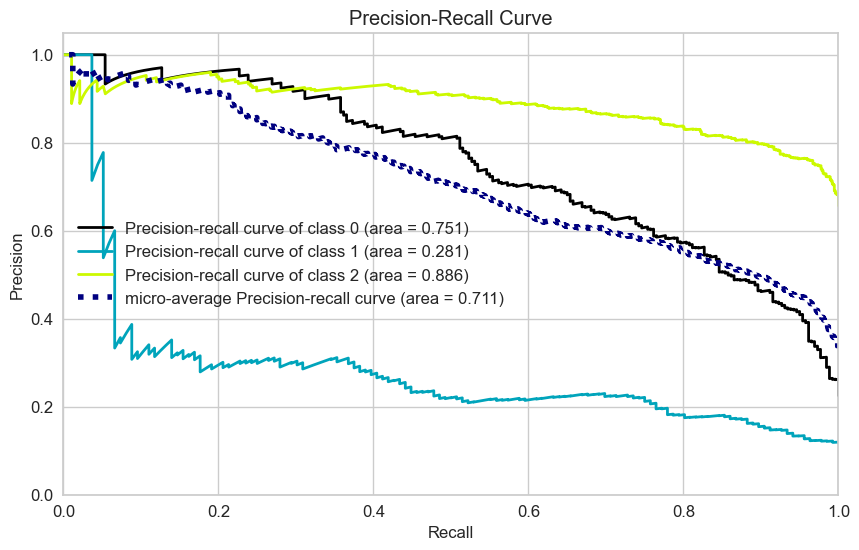

In [167]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(colsample_bytree=0.8,
                                              learning_rate=0.05,
                                              max_depth=2,
                                              n_estimators=20,
                                              subsample=0.8,
                                              random_state=101))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, 
          y_train_xgb, 
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [168]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [169]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.2814621738370339

In [170]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

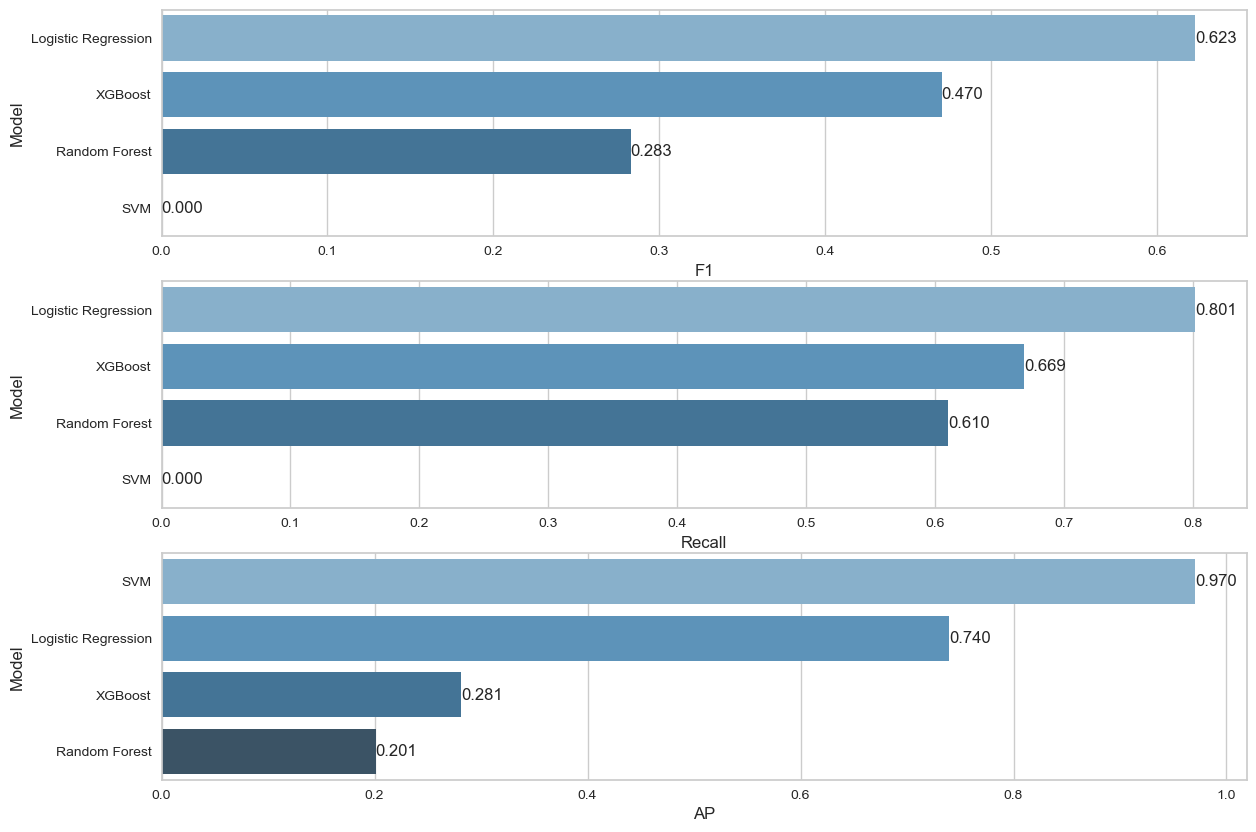

In [171]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [199]:
!pip install imblearn

In [175]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [176]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [177]:
X_train_ohe = column_trans.fit_transform(X_train)

In [178]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

# over_sampling(smote) ve under_sampling (RandomUnderSampler) sadece X_train ve y_train'e uygulanır. tüm dataya uygulanıp sonra
# data train ve test setine ayrılırsa data_leakege gereçekleşir ve scorlarınız çok iyi olur. Bu sebeple data önce train ve 
# test setine ayrılmalı ve sonra da sadece train datasına uygulanmalıdır.

In [179]:
X_train_over.shape

(9102, 224)

In [180]:
y_train_over.value_counts()

# gördüğünüz gibi smote sonrası tüm classlar çoğunluk sınıf olan white'in gözlem sayısına eşitlendi.

# Ancak azınlık sınıfı çoğunluk olan sınıfa eşitlemek veya yaklaştırmak modeli overfitinge götürecektir. O yüzden azınlık sınıfa
# ait gözlem sayısı overfiting kontrolü yapılarak kontrollü bir şekilde artırılmalıdır.

White       3034
Black       3034
Hispanic    3034
Name: dodrace, dtype: int64

In [181]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)
# sampling_strategy hyper_parametresi ile classları isteğimiz sayıda artıra bilir veya azaltabiliriz.

In [182]:
y_train_under.value_counts()

Black       543
Hispanic    543
White       543
Name: dodrace, dtype: int64

In [195]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})


In [196]:
y_train.value_counts()

# orjinal hispanic gözlem sayımız 543 olduğunu görüyoruz.

White       3034
Black       1038
Hispanic     543
Name: dodrace, dtype: int64

In [197]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [198]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: dodrace, dtype: int64

In [199]:
from imblearn.pipeline import Pipeline as imbpipeline

In [200]:
# Yaptığımız over_sampling ve under_sampling işlemlerimizi otomotize hale getiriyoruz.
steps = [('o', over), ('u', under)]


pipeline = imbpipeline(steps=steps)

#önce hispanic calsının sayısı bizim verdiğimiz talimat kapsamında 1000'e çıkarılıp, sonra white klası 2500'e indirilecek.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [201]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: dodrace, dtype: int64

In [202]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: dodrace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [203]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [204]:
operations = [("OneHotEncoder",column_trans), 
              ('o', over),
              ('u', under), 
              ("log", LogisticRegression(max_iter=10000, 
                                         random_state=101))] #("scaler", MinMaxScaler())

# over veya under sampling dataya uygulandığında kesinlikle class_weight="balanced" kullanılmaz.

In [205]:
smote_pipeline = imbpipeline(steps=operations)

In [206]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [207]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[233  13  14]
 [  5  94  37]
 [  9  35 714]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.66      0.69      0.68       136
       White       0.93      0.94      0.94       758

    accuracy                           0.90      1154
   macro avg       0.85      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 942   26   70]
 [  25  373  145]
 [  33  139 2862]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.92      1038
    Hispanic       0.69      0.69      0.69       543
       White       0.93      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.85      4615
weighted avg       0.90      0.91      0.90      4615



In [208]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.6399716
train_f1_Hispanic          0.7005271
test_precision_Hispanic    0.6421954
train_precision_Hispanic   0.6944607
test_recall_Hispanic       0.6427273
train_recall_Hispanic      0.7067757
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [263]:
#conda install -c conda-forge shap

Retrieving notices: ...working... done
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.4=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2023.03=py39_0
  - defaults/osx-64::_anaconda_depends==2023.03=py39_0
  - defaults/osx-64::matplotlib==3.7.0=py39hecd8cb5_0
  - defaults/osx-64::seaborn==0.12.2=py39hecd8cb5_0
  - defaults/osx-64::hvplot==0.8.2=py39hecd8cb5_0
done

## Package Plan ##

  environment location: /Users/tugbakaragozoglu/opt/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1t             |       hfd90126_0         1.7 MB  conda-forge
    shap-0.41.0                |   py39hf72b562_0         581 KB  conda-forge
    slicer-0.0.7               |     pyhd8ed1ab_0          16 KB  conda

In [211]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                           sparse=False), cat), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',
                                max_iter=10000,
                                random_state=101,
                                penalty="l1",
                                solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [212]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[238  11  11]
 [  7 103  26]
 [ 16  90 652]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.50      0.76      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 977   32   29]
 [  21  452   70]
 [  75  348 2611]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1038
    Hispanic       0.54      0.83      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [213]:
operations = [("OneHotEncoder", column_trans_shap),
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101,
                                         penalty="l1",
                                         solver='saga'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]



test_f1_Hispanic           0.5983133
train_f1_Hispanic          0.6579709
test_precision_Hispanic    0.4910426
train_precision_Hispanic   0.5416557
test_recall_Hispanic       0.7659361
train_recall_Hispanic      0.8379279
dtype: float64

In [214]:
features = column_trans_shap.get_feature_names_out()
features

array(['subjectsbirthlocation_Alabama', 'subjectsbirthlocation_Alaska',
       'subjectsbirthlocation_Antigua and Barbuda',
       'subjectsbirthlocation_Argentina', 'subjectsbirthlocation_Arizona',
       'subjectsbirthlocation_Arkansas', 'subjectsbirthlocation_Bahamas',
       'subjectsbirthlocation_Barbados', 'subjectsbirthlocation_Belarus',
       'subjectsbirthlocation_Belgium', 'subjectsbirthlocation_Belize',
       'subjectsbirthlocation_Bermuda', 'subjectsbirthlocation_Bolivia',
       'subjectsbirthlocation_Bosnia and Herzegovina',
       'subjectsbirthlocation_British Virgin Islands',
       'subjectsbirthlocation_Bulgaria',
       'subjectsbirthlocation_California',
       'subjectsbirthlocation_Cameroon', 'subjectsbirthlocation_Canada',
       'subjectsbirthlocation_Cape Verde',
       'subjectsbirthlocation_Colombia', 'subjectsbirthlocation_Colorado',
       'subjectsbirthlocation_Connecticut',
       'subjectsbirthlocation_Costa Rica', 'subjectsbirthlocation_Cuba',
      

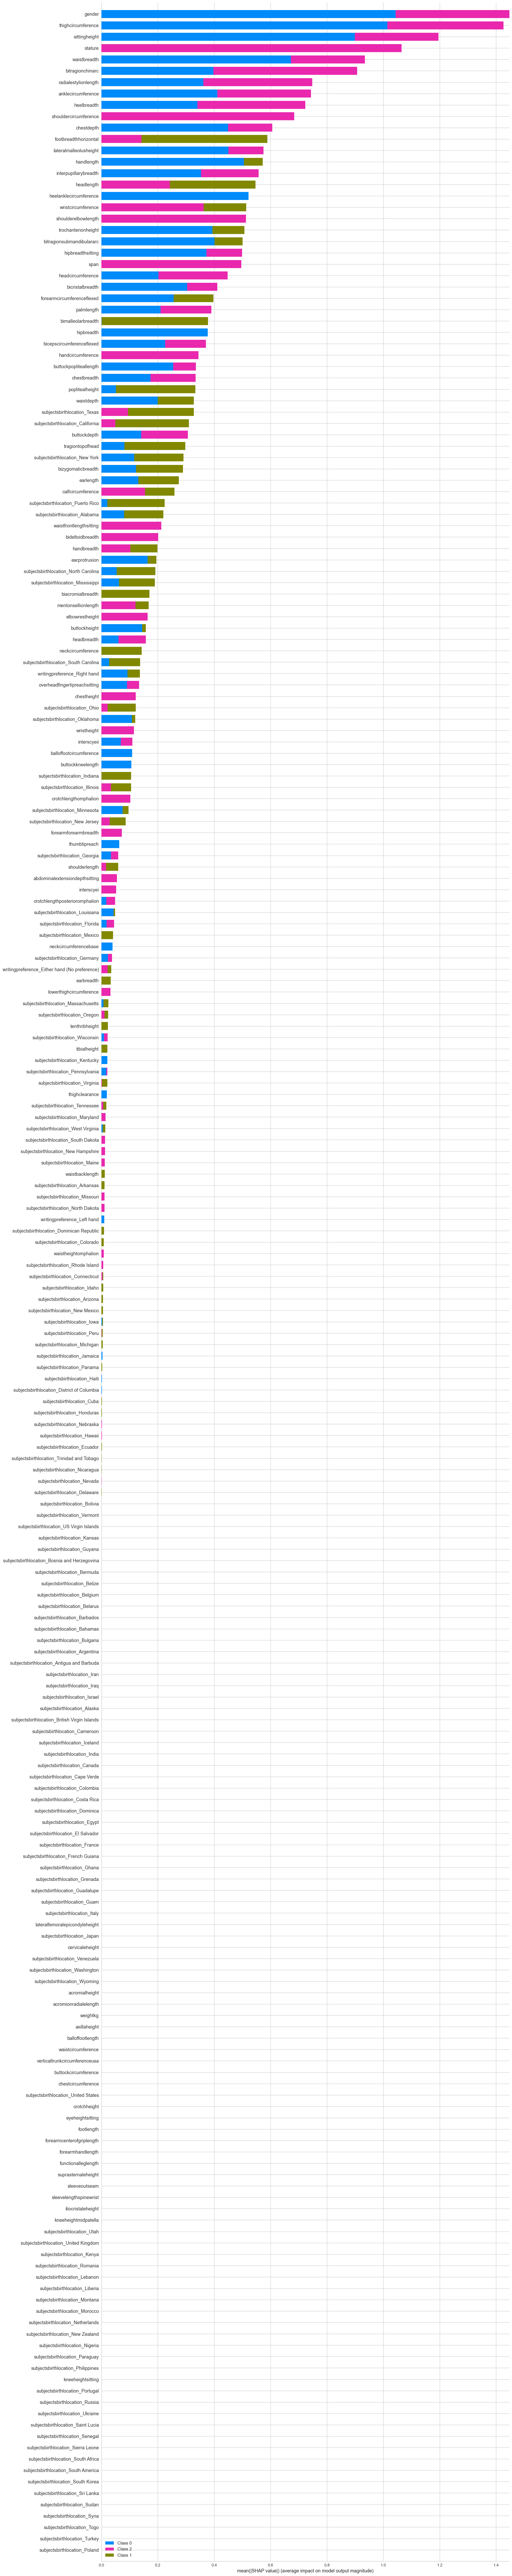

In [215]:
explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = features, plot_size=(20,100))


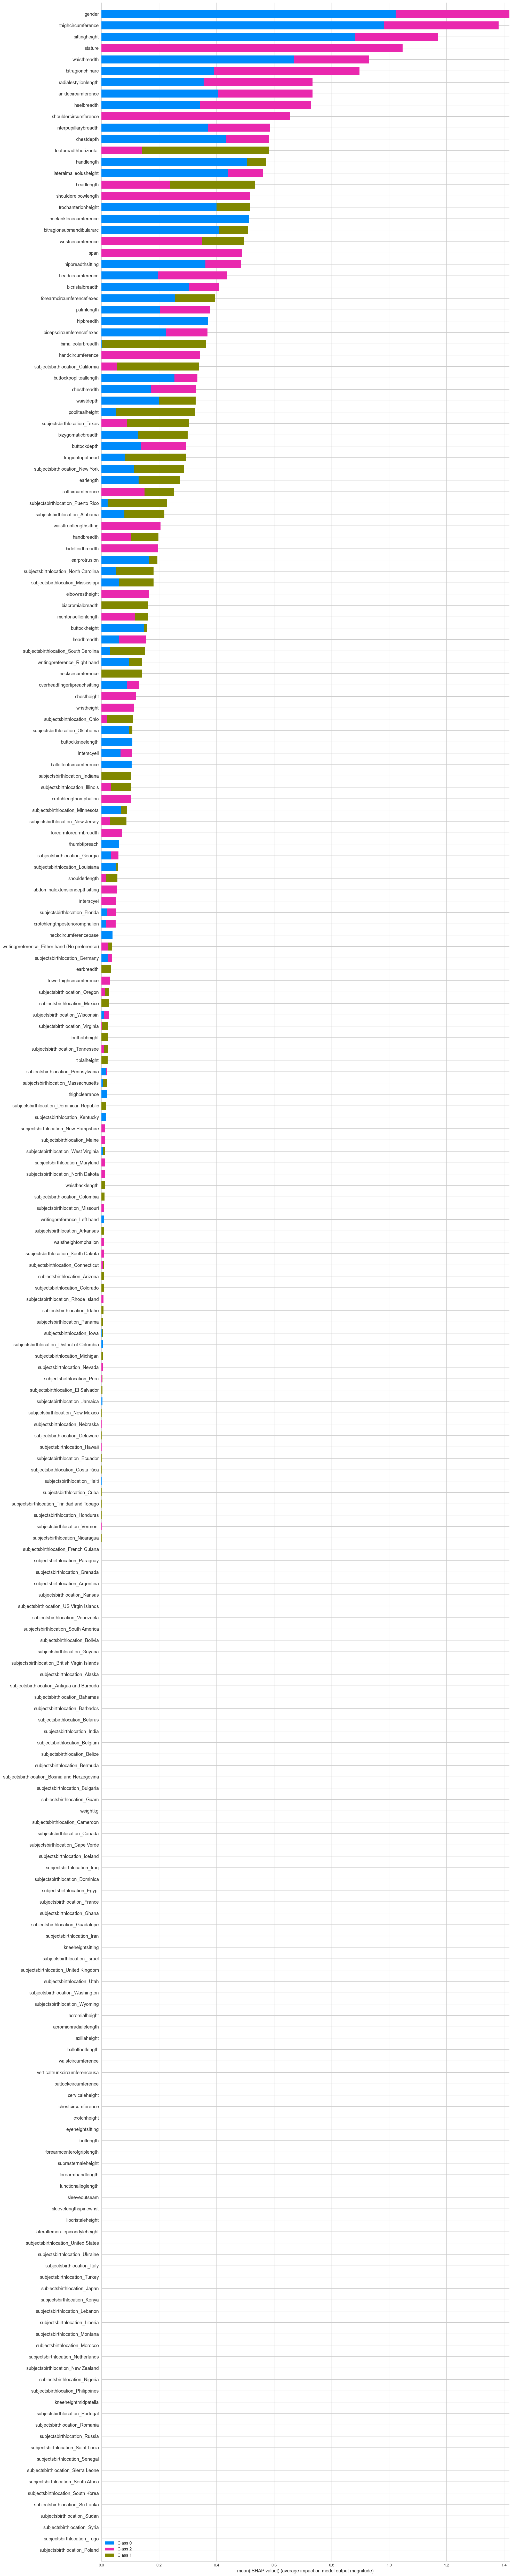

In [216]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = features, plot_size=(20,100))

# maviler black, pembe white ve yeşil hispanic
# gördüğünüz gibi en önemli ilk 13 feature içerisinde hispanic'in tahminine katkı sağlayan feature yok.
# hispaniclerin predictionesine katkısı olan 19 feature seçiyoruz.

In [217]:
hispanic=["subjectsbirthlocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
          'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'writingpreference', 
          'tragiontopofhead','bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 
          'buttockkneelength', 'earlength', 'axillaheight']

In [218]:
X2 = X[hispanic]
X2.head()

subjectsbirthlocation  handlength  forearmcircumferenceflexed  headlength  \
0          North Dakota         193                         299         206   
1              New York         195                         289         201   
2              New York         203                         357         202   
3             Wisconsin         194                         318         199   
4        North Carolina         218                         324         197   

   bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth  \
0                        291                    101                  71   
1                        320                     98                  67   
2                        330                    103                  75   
3                        309                    106                  73   
4                        310                    111                  80   

   poplitealheight  waistdepth writingpreference  tragiontopofhead  \
0              437         240        Right hand               140   
1              417         225         Left hand               120   
2              431         255         Left hand               125   
3              393         205        Right hand               127   
4              523         214        Right hand               122   

   bideltoidbreadth  neckcircumferencebase  biacromialbreadth  buttockheight  \
0               493                    436                401            882   
1               479                    420                394            870   
2               544                    434                427            901   
3               518                    446                401            821   
4               524                    430                435           1080   

   buttockkneelength  earlength  axillaheight  
0                619         71          1347  
1                584         62          1293  
2                623         61          1327  
3                560         66          1239  
4                706         56          1478

In [219]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['subjectsbirthlocation', 'writingpreference'], dtype='object')

In [220]:
X2.shape

(5769, 18)

In [221]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [222]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                           sparse=False), cat_new), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

operations_shap = [("OneHotEncoder",column_trans_shap),
                   ("log", LogisticRegression(class_weight='balanced',
                                              max_iter=10000,
                                              random_state=101,
                                              penalty="l1",
                                              solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [223]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[213  16  31]
 [  9 108  19]
 [ 95 129 534]]
              precision    recall  f1-score   support

       Black       0.67      0.82      0.74       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.70      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.77      0.70      1154
weighted avg       0.80      0.74      0.75      1154


Train_Set
[[ 876   50  112]
 [  31  440   72]
 [ 362  525 2147]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76      1038
    Hispanic       0.43      0.81      0.56       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.76      4615



In [224]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, 
                        X_train2,
                        y_train2, 
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.5424231
train_f1_Hispanic          0.5690847
test_precision_Hispanic    0.4192224
train_precision_Hispanic   0.4376385
test_recall_Hispanic       0.7697757
train_recall_Hispanic      0.8135367
dtype: float64

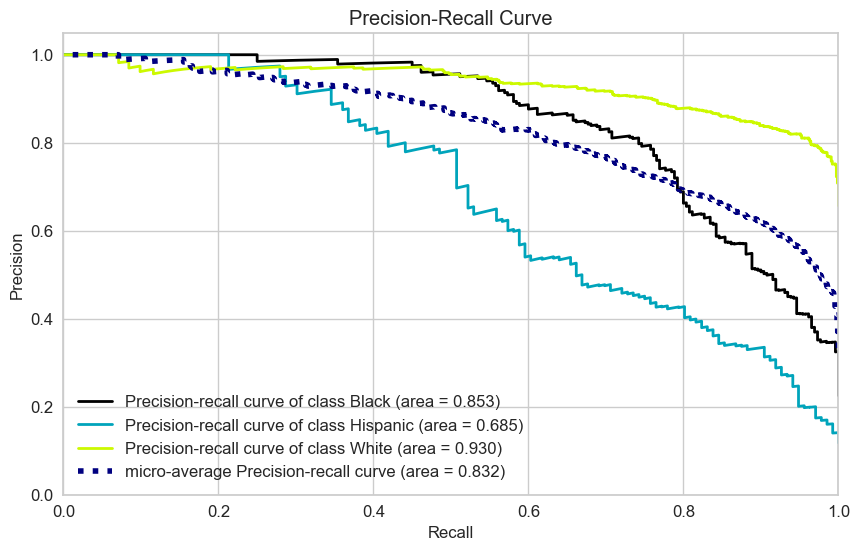

In [225]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show();

In [228]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(class_weight='balanced',
                                               max_iter=10000,
                                               random_state=101))]

final_model = Pipeline(steps=operations_final)

In [229]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [230]:
X[X.gender== 1].describe()


abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                    3899.0000000    3899.0000000           3899.0000000   
mean                      255.4490895    1442.9463965            335.8194409   
std                        37.2951172      62.3569061             17.2814127   
min                       163.0000000    1194.0000000            270.0000000   
25%                       228.0000000    1401.0000000            324.0000000   
50%                       252.0000000    1441.0000000            335.0000000   
75%                       280.0000000    1483.0000000            347.0000000   
max                       451.0000000    1683.0000000            393.0000000   

       anklecircumference  axillaheight  balloffootcircumference  \
count        3899.0000000  3899.0000000             3899.0000000   
mean          229.5909207  1331.0984868              252.1659400   
std            14.5793992    58.7142513               12.8935098   
min           156.0000000  1106.0000000              186.0000000   
25%           220.0000000  1291.0000000              244.0000000   
50%           229.0000000  1330.0000000              252.0000000   
75%           239.0000000  1368.0000000              261.0000000   
max           293.0000000  1553.0000000              306.0000000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count      3899.0000000       3899.0000000               3899.0000000   
mean        201.2295460        416.0043601                358.5796358   
std          10.3293576         19.0748366                 34.5119235   
min         156.0000000        337.0000000                246.0000000   
25%         194.0000000        403.0000000                335.0000000   
50%         201.0000000        415.0000000                358.0000000   
75%         208.0000000        428.0000000                380.0000000   
max         245.0000000        489.0000000                490.0000000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count      3899.0000000      3899.0000000        3899.0000000   
mean        275.6322134       510.9276738          74.8440626   
std          17.5124276        32.4502603           4.0970522   
min         219.0000000       374.0000000          59.0000000   
25%         263.0000000       489.5000000          72.0000000   
50%         275.0000000       510.0000000          75.0000000   
75%         288.0000000       532.0000000          77.0000000   
max         334.0000000       637.0000000          91.0000000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count      3899.0000000               3899.0000000        3899.0000000   
mean        331.6558092                315.7183893         142.4349833   
std          13.9707980                 16.6405021           6.1416131   
min         281.0000000                259.0000000         120.0000000   
25%         322.0000000                305.0000000         138.0000000   
50%         332.0000000                315.0000000         142.0000000   
75%         341.0000000                326.0000000         147.0000000   
max         385.0000000                390.0000000         166.0000000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count          3899.0000000  3899.0000000   3899.0000000       3899.0000000   
mean           1021.2941780   246.3624006    889.5003847        619.2172352   
std              76.3305636    26.4224323     49.4120608         30.0603336   
min             737.0000000   171.0000000    716.0000000        518.0000000   
25%             968.5000000   227.0000000    855.0000000        599.0000000   
50%            1018.0000000   246.0000000    887.0000000        618.0000000   
75%            1070.0000000   263.0000000    921.0000000        640.0000000   
max            1305.0000000   343.0000000   1080.0000000        736.0000000   

       buttockpopliteallength  calfcircumference  

In [231]:
male_mean_human = X[X.gender==1].describe(include="all").loc["mean"]
male_mean_human

# mean değerlerini loc["mean"] ile çekiyoruz. include="all" diyerek kategorik verilerinde döndürülmesini istiyoruz. 
# Kategorik veriler Nan döneceğinden bu kategorik gözlemlere aşağıdaki atamaları yapıyoruz.

abdominalextensiondepthsitting    255.4490895
acromialheight                   1442.9463965
acromionradialelength             335.8194409
anklecircumference                229.5909207
axillaheight                     1331.0984868
balloffootcircumference           252.1659400
balloffootlength                  201.2295460
biacromialbreadth                 416.0043601
bicepscircumferenceflexed         358.5796358
bicristalbreadth                  275.6322134
bideltoidbreadth                  510.9276738
bimalleolarbreadth                 74.8440626
bitragionchinarc                  331.6558092
bitragionsubmandibulararc         315.7183893
bizygomaticbreadth                142.4349833
buttockcircumference             1021.2941780
buttockdepth                      246.3624006
buttockheight                     889.5003847
buttockkneelength                 619.2172352
buttockpopliteallength            504.0010259
calfcircumference                 392.4265196
cervicaleheight                  1

In [232]:
male_mean_human["gender"] = 1
male_mean_human["subjectsbirthlocation"] = "California"
male_mean_human["writingpreference"] = "Right hand"

# ilgili atamaları yapıyoruz.

In [233]:

pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                    255.4490895   1442.9463965           335.8194409   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean        229.5909207 1331.0984868             252.1659400      201.2295460   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean       416.0043601               358.5796358      275.6322134   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean      510.9276738         74.8440626      331.6558092   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean               315.7183893        142.4349833         1021.2941780   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean  246.3624006   889.5003847       619.2172352            504.0010259   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean       392.4265196    1519.4221595  289.7868684       1060.4967940   

      chestdepth  chestheight crotchheight crotchlengthomphalion  \
mean 254.3901000 1293.0402667  847.6375994           623.1431136   

     crotchlengthposterioromphalion earbreadth  earlength earprotrusion  \
mean                    356.3547063 36.0951526 64.1710695    23.1097717   

     elbowrestheight eyeheightsitting footbreadthhorizontal  footlength  \
mean     244.8235445      804.8850987           101.8938189 271.5739933   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean               349.5734804                310.5280841   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean           580.7022313       480.9289561        1132.1256732  88.3798410   

     handcircumference  handlength headbreadth headcircumference  headlength  \
mean       212.5711721 193.5093614 154.1836368       574.7081303 199.7607079   

     heelanklecircumference heelbreadth  hipbreadth hipbreadthsitting  \
mean            344.0020518  72.5645037 346.2567325       379.9484483   

     iliocristaleheight interpupillarybreadth  interscyei interscyeii  \
mean       1063.4126699           639.9487048 431.3939472 450.6286227   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean          489.3665042       555.2249295                    492.6255450   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean             73.0615542             409.6706848         122.6845345   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean       398.1921005           435.1595281                  1428.4693511   

      palmlength poplitealheight radialestylionlength shouldercircumference  \
mean 116.6101565     430.6847910          268.3139266          1179.9025391   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean         364.3059759    149.8322647   918.6786355            897.1792767   

     sleeveoutseam         span      stature suprasternaleheight  \
mean   594.0079508 1816.6288792 1758.3854835        1440.6996666   

     tenthribheight thighcircumference thighclearance thumbtipreach  \
mean   1122.4444729        626.3352142    180.7394204   813.0854065   

     tibialheight tragiontopofhead trochanterionheight  \
mean  469.2228777      131.1166966         902.5868171   

     verticaltrunkcircumferenceusa waistbacklength waistbreadth  \
mean                  1666.7832778     478.0179533  327.1107976   

     waistcircumference  waistdepth waistfrontlengthsitting  \
mean        943.0433444 238.5604001             388.0174404   

     waistheightomphalion    weightkg wristcircumference wristheight gender  \
mean         1058.2398051 858.7142857        176.1687612 848.7622467      1   

     subjectsbirthlocation writingpreference  
mean            California        Right hand

In [234]:
final_model.predict(pd.DataFrame(male_mean_human).T)
# 3. hispanic

array(['Hispanic'], dtype=object)

In [238]:
import pickle
pickle.dump(final_model, open("final_ansur_II_public", 'wb'))

In [239]:
final_ansur_II_public = pickle.load(open("final_ansur_II_public", "rb"))
final_ansur_II_public

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [240]:
samples = df.sample(10)
X_samples = samples.drop("dodrace", axis=1)
y_samples = samples["dodrace"]

In [241]:
X.shape

(5769, 96)

In [242]:
X_samples.shape

(10, 96)

In [243]:
y_samples.shape

(10,)

In [247]:
final_model = pickle.load(open("final_ansur_II_public", "rb"))

predictions = final_model.predict(X_samples)
predictions_proba = final_model.predict_proba(X_samples)

In [248]:
samples["pred"] = predictions
samples["pred_1"] = predictions_proba[:,0]
samples["pred_2"] = predictions_proba[:,1]
samples["pred_3"] = predictions_proba[:,2]
samples

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
2332                             217            1348                    320   
1862                             279            1351                    323   
5234                             200            1349                    317   
903                              210            1426                    341   
4480                             249            1399                    327   
1460                             201            1445                    337   
1083                             207            1455                    322   
4917                             257            1383                    315   
1797                             223            1474                    342   
1542                             290            1557                    340   

      anklecircumference  axillaheight  balloffootcircumference  \
2332                 216          1264                      240   
1862                 242          1227                      245   
5234                 238          1231                      238   
903                  202          1322                      233   
4480                 213          1284                      244   
1460                 211          1333                      241   
1083                 214          1336                      228   
4917                 227          1281                      233   
1797                 217          1375                      256   
1542                 241          1422                      261   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
2332               200                399                        354   
1862               192                404                        389   
5234               187                370                        315   
903                194                401                        335   
4480               195                382                        335   
1460               189                399                        310   
1083               184                369                        332   
4917               189                385                        300   
1797               194                429                        312   
1542               200                407                        363   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
2332               248               486                  76   
1862               274               529                  71   
5234               270               459                  70   
903                277               489                  65   
4480               301               514                  70   
1460               271               473                  72   
1083               252               454                  66   
4917               288               478                  72   
1797               286               505                  69   
1542               282               538                  74   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
2332               327                        307                 144   
1862               322                        317                 148   
5234               310                        285                 144   
903                324                        301                 144   
4480               308                        303                 139   
1460               330                        306                 144   
1083               301                        294                 134   
4917               316                        297                 139   
1797               341                        303                 144   
1542               336                        341                 141   

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
2332              

In [249]:
samples[['dodrace','pred']]

dodrace      pred
2332     Black     Black
1862     White     White
5234  Hispanic  Hispanic
903      White     White
4480     White     White
1460     White     White
1083     White     White
4917     White     White
1797     White     White
1542     White     White